# Bitcoin Historical Data Analysis

This project provides an in-depth exploratory data analysis (EDA) of Bitcoin historical price data. Below is a breakdown of the key analytical steps:

Data Loading & Inspection
The dataset is loaded into a Pandas DataFrame, and the first few rows are displayed to understand its structure.

In [ ]:
# Install and set up Kaggle API
!pip install kaggle
from google.colab import files
files.upload()  # Upload kaggle.json manually

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d mirichoi0218/insurance
!unzip insurance.zip

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'insurance.csv'
insurance_df = pd.read_csv(file_path)

Saving kaggle.json to kaggle (4).json
Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
insurance.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  insurance.zip
replace insurance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: insurance.csv           


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Loading the Dataset
The dataset is imported into a Pandas DataFrame for analysis.

# Displaying First Few Rows

The first few rows are displayed to get an initial understanding of the data structure.

In [ ]:
# Display first few rows
insurance_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Checking for Missing Values
We check for missing values to determine if any cleaning is required.

In [ ]:
# Check for missing values
missing_values = insurance_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# Summary Statistics
Basic statistical summaries (mean, median, standard deviation, etc.) help us understand the distribution of numerical variables.

In [ ]:
# Summary statistics
summary_stats = insurance_df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


# Distribution of Insurance Charges
A histogram is used to display how insurance charges are distributed across the dataset.

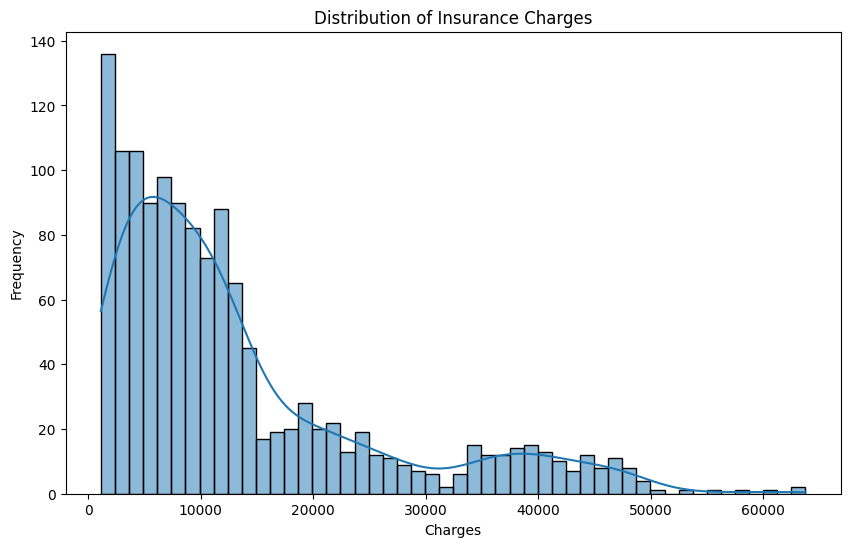

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(insurance_df['charges'], bins=50, kde=True)
plt.title("Distribution of Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

# Age vs. Insurance Charges
A scatter plot shows the relationship between age and insurance charges.

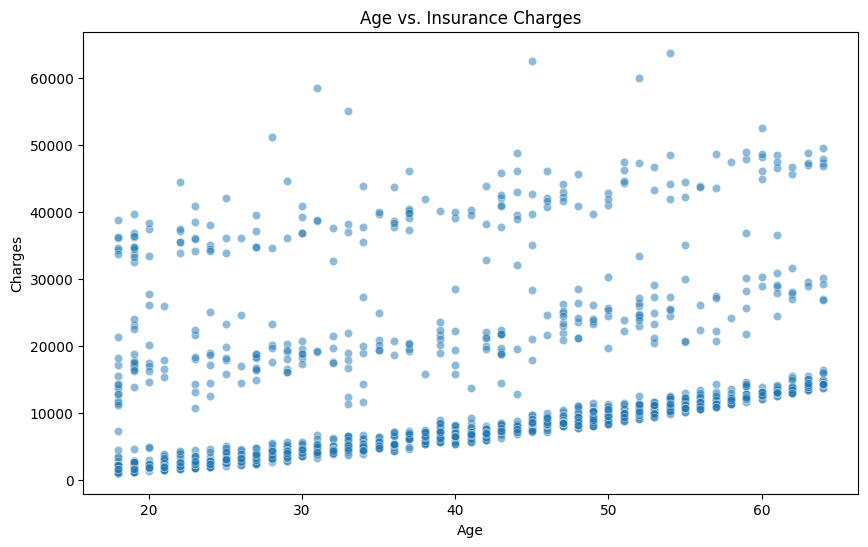

In [ ]:
# Age vs. Charges
plt.figure(figsize=(10,6))
sns.scatterplot(x=insurance_df['age'], y=insurance_df['charges'], alpha=0.5)
plt.title("Age vs. Insurance Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

# BMI vs. Insurance Charges
A scatter plot highlights how BMI affects charges, with smoking status as a hue for added insights.

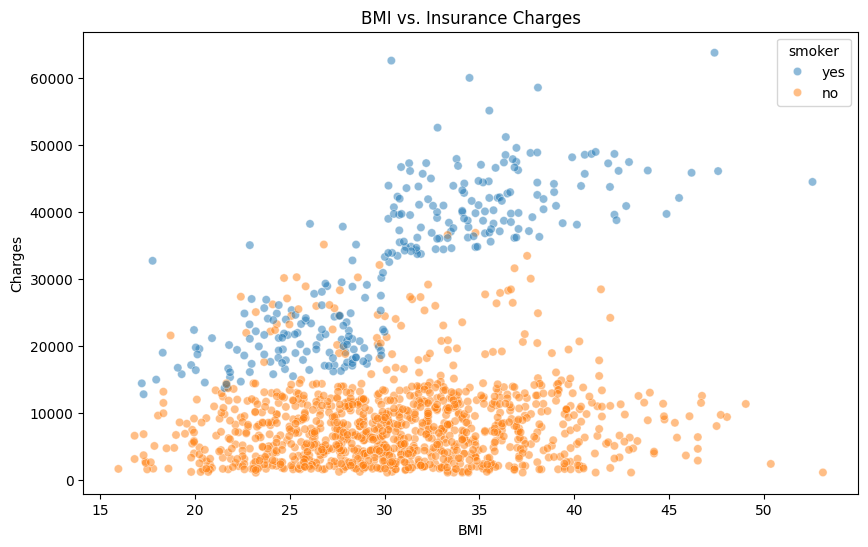

In [ ]:
# BMI vs. Charges
plt.figure(figsize=(10,6))
sns.scatterplot(x=insurance_df['bmi'], y=insurance_df['charges'], alpha=0.5, hue=insurance_df['smoker'])
plt.title("BMI vs. Insurance Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

# Region-wise Distribution of Charges
A boxplot compares insurance charges across different regions.

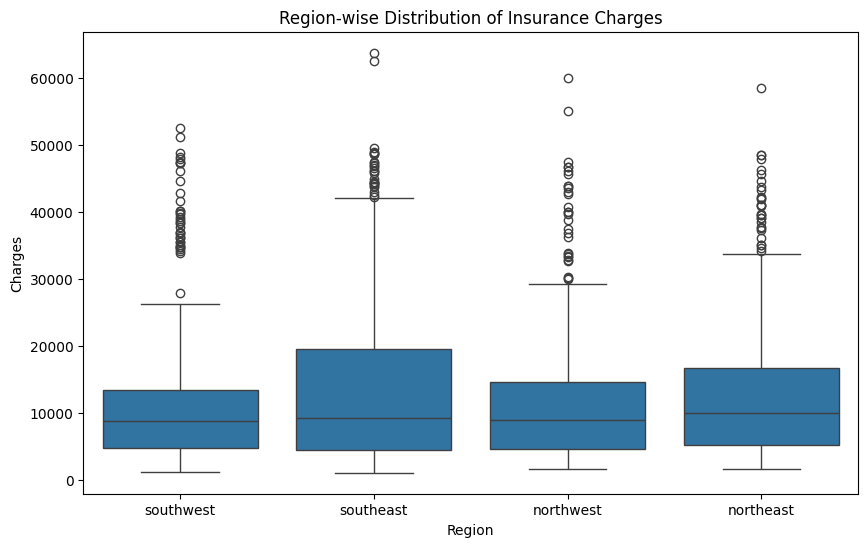

In [ ]:
# Region-wise distribution of charges
plt.figure(figsize=(10,6))
sns.boxplot(x=insurance_df['region'], y=insurance_df['charges'])
plt.title("Region-wise Distribution of Insurance Charges")
plt.xlabel("Region")
plt.ylabel("Charges")
plt.show()

# Impact of Smoking on Charges
A boxplot illustrates the significant difference in charges between smokers and non-smokers.

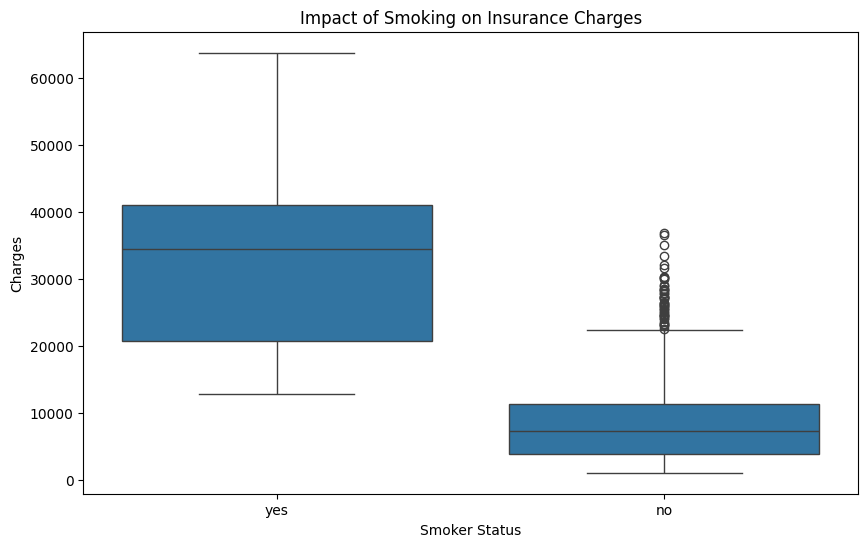

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=insurance_df['smoker'], y=insurance_df['charges'])
plt.title("Impact of Smoking on Insurance Charges")
plt.xlabel("Smoker Status")
plt.ylabel("Charges")
plt.show()

# Number of Children vs. Insurance Charges
A boxplot explores whether having more children affects insurance costs.


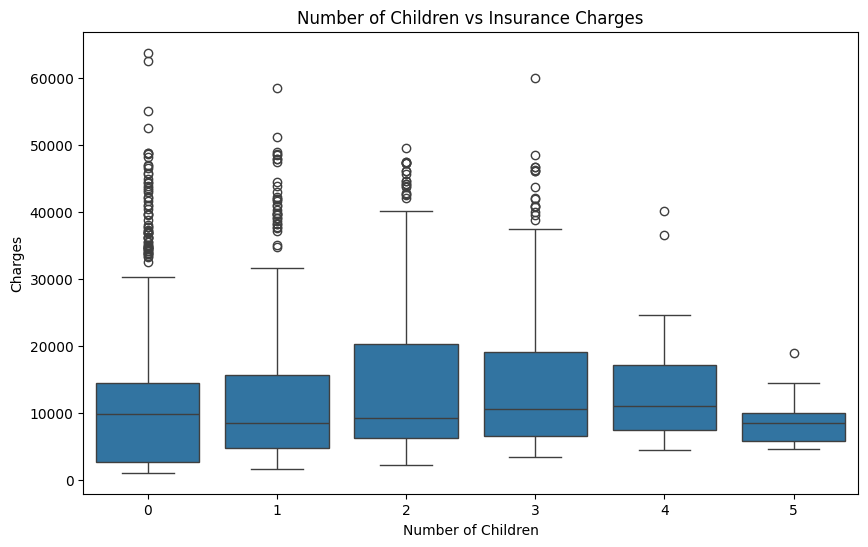

In [ ]:
# Children vs Charges
plt.figure(figsize=(10,6))
sns.boxplot(x=insurance_df['children'], y=insurance_df['charges'])
plt.title("Number of Children vs Insurance Charges")
plt.xlabel("Number of Children")
plt.ylabel("Charges")
plt.show()

# Gender-wise Distribution of Charges
A boxplot examines if there is a noticeable difference in charges based on gender.


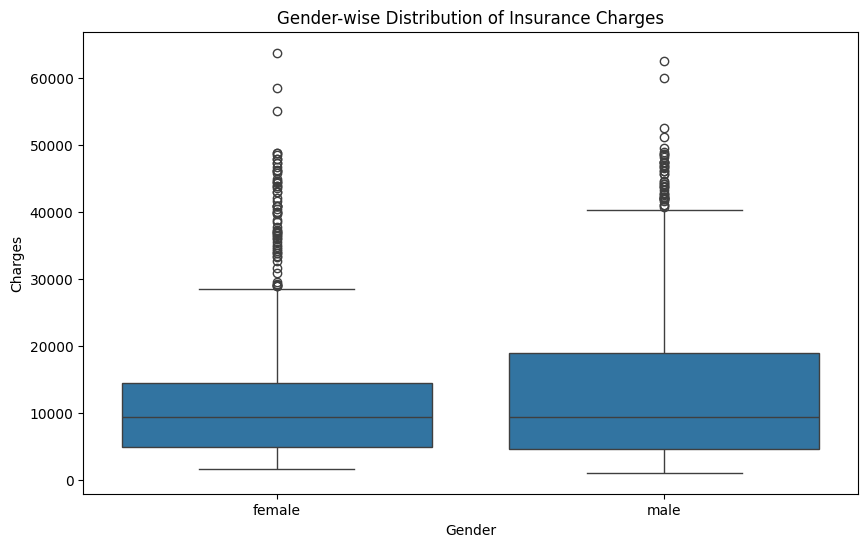

In [ ]:
# Gender vs Charges
plt.figure(figsize=(10,6))
sns.boxplot(x=insurance_df['sex'], y=insurance_df['charges'])
plt.title("Gender-wise Distribution of Insurance Charges")
plt.xlabel("Gender")
plt.ylabel("Charges")
plt.show()

# BMI Category Creation
BMI is categorised into Underweight, Normal, Overweight, and Obese to analyse its impact on charges.

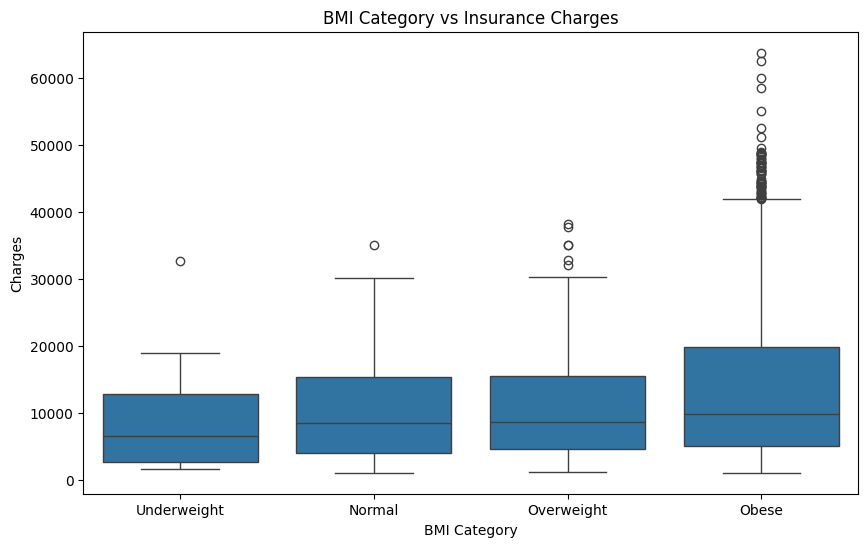

In [ ]:
# BMI Category Creation
insurance_df['bmi_category'] = pd.cut(insurance_df['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.figure(figsize=(10,6))
sns.boxplot(x=insurance_df['bmi_category'], y=insurance_df['charges'])
plt.title("BMI Category vs Insurance Charges")
plt.xlabel("BMI Category")
plt.ylabel("Charges")
plt.show()

# Age Group Categorization
Age is divided into groups (Young, Adult, Middle-aged, Senior) for better comparison.

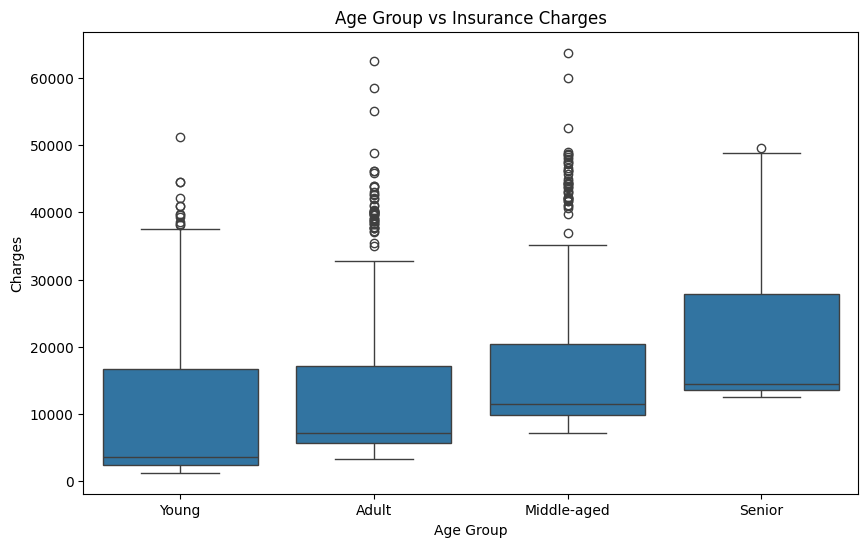

In [ ]:
# Age Group Creation
insurance_df['age_group'] = pd.cut(insurance_df['age'], bins=[18, 30, 45, 60, 100], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])
plt.figure(figsize=(10,6))
sns.boxplot(x=insurance_df['age_group'], y=insurance_df['charges'])
plt.title("Age Group vs Insurance Charges")
plt.xlabel("Age Group")
plt.ylabel("Charges")
plt.show()

# Pairplot for Relationships
A pairplot visualises potential correlations among multiple features.

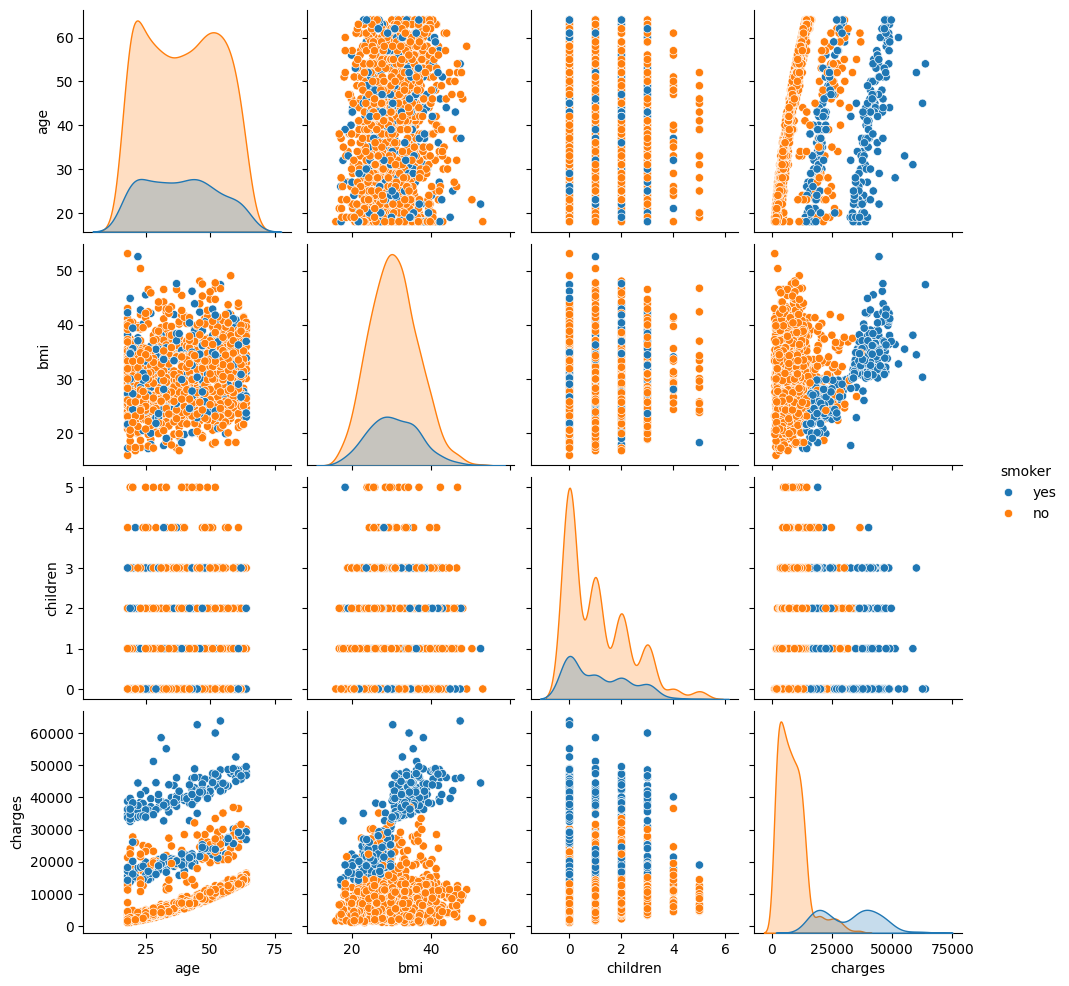

In [ ]:
# Pairplot for relationships
sns.pairplot(insurance_df, hue='smoker')
plt.show()

# One-Hot Encoding for Categorical Variables
Categorical variables are converted into numerical form to prepare the dataset for machine learning.


In [35]:
# One-Hot Encoding for Categorical Data
insurance_encoded = pd.get_dummies(insurance_df, columns=['sex', 'smoker', 'region', 'bmi_category', 'age_group'], drop_first=True)


# Saving Processed Data
The cleaned dataset is saved as a CSV file for further analysis or sharing.

In [36]:
# Save processed dataset in csv format
insurance_encoded.to_csv("processed_insurance_data.csv", index=False)
print("Processed dataset saved successfully!")


Processed dataset saved successfully!
